# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
**Import numpy and pandas**

In [3]:
import numpy as np
import pandas as pd

**Import visualization libraries and set %matplotlib inline.**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the csv file as a dataframe called df **

In [4]:
df=pd.read_csv("911.csv")

**Check the info() of the df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 4.9+ MB


**Check the head of df**

In [5]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [6]:
df.groupby(by="zip").count().sort_values(by="lat",ascending=False).head(5)["lat"]

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: lat, dtype: int64

In [40]:
df.value_counts(df["zip"]).head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [5]:
df.value_counts(df["twp"]).head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [11]:
df["title"].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [7]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [28]:
def givereason(title):
    return title.split(":")[0]

In [30]:
df["title"].apply(givereason)

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [5]:
df["Reason"]=df["title"].apply(lambda title:title.split(":")[0])

In [37]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


**What is the most common Reason for a 911 call based off of this new column?**

In [6]:
df.value_counts(df["Reason"])

Reason
EMS        48877
Traffic    35695
Fire       14920
dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

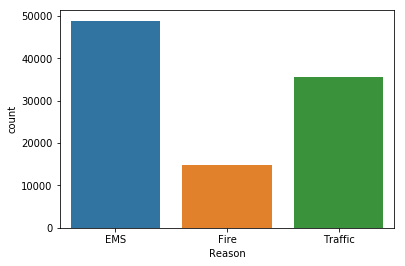

In [7]:
sns.countplot(x="Reason",data=df)

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [11]:
type(df["timeStamp"][0])

str

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   Reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 5.3+ MB


**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [7]:
df["timeStamp"]=pd.to_datetime(df["timeStamp"])

In [10]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


In [11]:
df["timeStamp"].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [12]:
df["timeStamp"].iloc[0].hour

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [36]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


In [26]:
df["hour"]=df["timeStamp"].apply(lambda time:time.hour)
df["Month"]=df["timeStamp"].apply(lambda time:time.month)

In [31]:
df["Day of Week"]=df["timeStamp"].apply(lambda time:time.day%7)

In [30]:
df["Day of Week2"]=df["timeStamp"].apply(lambda time:time.dayofweek)

In [11]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of Week,Day of Week2
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,3,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,3,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,3,3


In [32]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [33]:
df["Day of Week"]=df["Day of Week"].map(dmap)

In [19]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

(0, 8000)

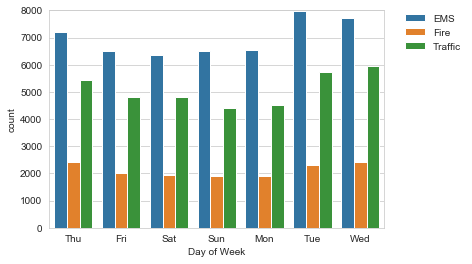

In [23]:
sns.countplot(x="Day of Week",data=df,hue="Reason")

sns.set_style("whitegrid")

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
plt.ylim(0,8000)

**Now do the same for Month:**

(0, 7000)

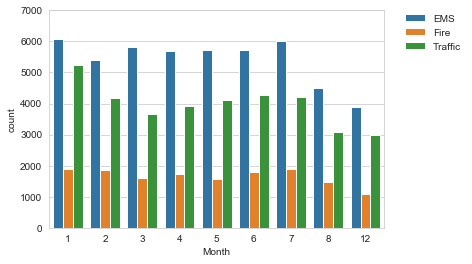

In [24]:
sns.countplot(x="Month",data=df,hue="Reason")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
plt.ylim(0,7000)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [25]:
byMonth=df.groupby(by="Month").count()
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

(1, 12)

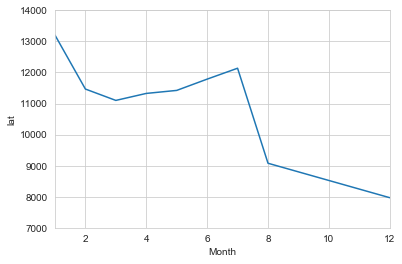

In [26]:
sns.lineplot(data=byMonth["lat"])
plt.ylim(7000,14000)
plt.xlim(1,12)

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

In [27]:
byMonth2=byMonth.reset_index()

In [28]:
byMonth2

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


(0, 14)

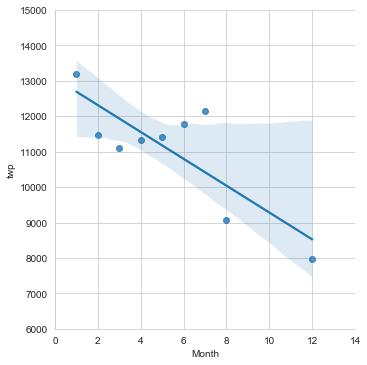

In [30]:
#shaded area shows error, it grows for data we don't have
sns.lmplot(x="Month",y="twp",data=byMonth2)
plt.ylim(6000,15000)
plt.xlim(0,14)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [12]:
df["date"]=df["timeStamp"].apply(lambda timestamp:timestamp.date())

In [13]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of Week,Day of Week2,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,3,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,3,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,3,3,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [14]:
groupdate=df.groupby(by="date").count()
groupdate.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of Week,Day of Week2
date,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403


In [17]:
newgroupdate=groupdate.reset_index()
newgroupdate.head(3)

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of Week,Day of Week2
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403


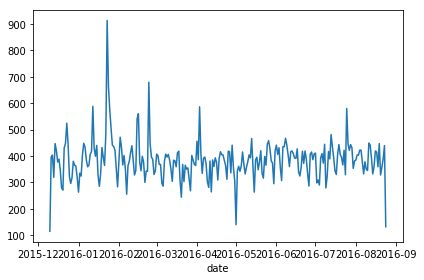

In [24]:
groupdate["lat"].plot()
plt.tight_layout()

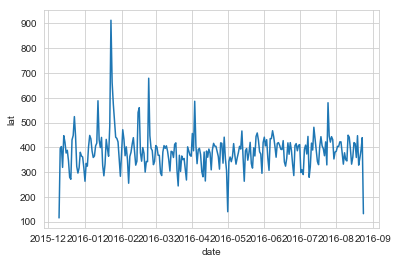

In [35]:
sns.lineplot(x="date",y="lat",data=newgroupdate)

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [52]:
traffic_df=df[df["Reason"]=="Traffic"].groupby(by="date").count().reset_index()
fire_df=df[df["Reason"]=="Fire"].groupby(by="date").count().reset_index()
ems_df=df[df["Reason"]=="EMS"].groupby(by="date").count().reset_index()

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of Week
0,2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
1,2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2,2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
3,2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
4,2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,2016-08-20,117,117,117,93,117,117,117,116,117,117,117,117,117
255,2016-08-21,138,138,138,105,138,138,138,133,138,138,138,138,138
256,2016-08-22,156,156,156,127,156,156,156,152,156,156,156,156,156
257,2016-08-23,151,151,151,128,151,151,151,149,151,151,151,151,151


Text(0.5,1,'Traffic')

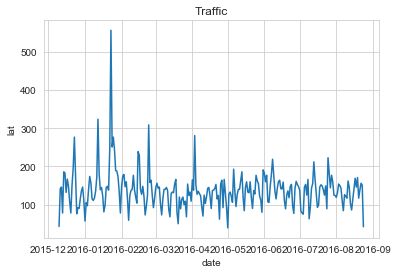

In [56]:
sns.lineplot(x="date",y="lat",data=traffic_df)
plt.title("Traffic")

Text(0.5,1,'Fire')

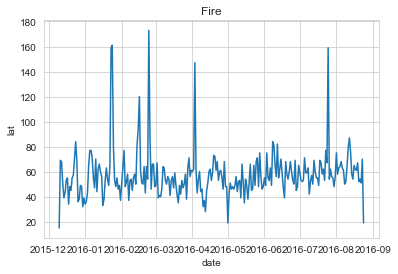

In [58]:
sns.lineplot(x="date",y="lat",data=fire_df)
plt.title("Fire")

Text(0.5,1,'EMS')

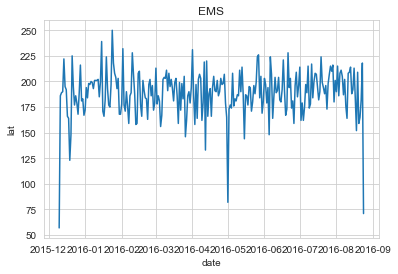

In [59]:
sns.lineplot(x="date",y="lat",data=ems_df)
plt.title("EMS")

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [63]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of Week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10


In [43]:
byDay=df.groupby(by=["Day of Week","hour"]).count().reset_index()

In [47]:
df.groupby(by=["Day of Week","hour"]).count()["lat"].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,293,200,201,165,170,206,287,554,748,769,...,798,876,852,882,787,664,591,480,454,313
Mon,308,235,259,186,170,208,334,450,606,718,...,770,770,839,877,773,652,519,479,413,322
Sat,249,228,189,180,176,184,303,483,661,667,...,798,848,893,838,766,719,565,576,425,343
Sun,283,259,193,212,193,210,324,506,654,652,...,821,776,804,824,714,652,566,483,430,329
Thu,325,260,216,223,245,262,391,679,769,820,...,843,877,930,932,892,745,739,627,523,402
Tue,333,233,242,206,247,274,452,620,830,846,...,1021,1038,1050,1066,889,718,723,554,536,426
Wed,321,306,249,263,217,285,422,678,776,842,...,946,969,1122,1098,941,758,674,589,502,424


In [44]:
byDay.head()

,Day of Week,hour,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Day of Week2,date,Month
0,Fri,0,293,293,293,259,293,293,293,292,293,293,293,293
1,Fri,1,200,200,200,182,200,200,200,199,200,200,200,200
2,Fri,2,201,201,201,171,201,201,201,197,201,201,201,201
3,Fri,3,165,165,165,148,165,165,165,165,165,165,165,165
4,Fri,4,170,170,170,153,170,170,170,169,170,170,170,170


In [75]:
day_hr_pivot=byDay.pivot_table(index="Day of Week",columns="hour",values="lat")

In [77]:
day_hr_pivot.head(3)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,293,200,201,165,170,206,287,554,748,769,...,798,876,852,882,787,664,591,480,454,313
Mon,308,235,259,186,170,208,334,450,606,718,...,770,770,839,877,773,652,519,479,413,322
Sat,249,228,189,180,176,184,303,483,661,667,...,798,848,893,838,766,719,565,576,425,343


**Now create a HeatMap using this new DataFrame.**

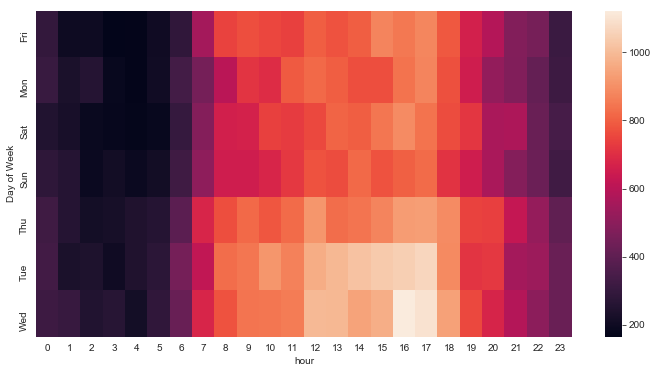

In [89]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=day_hr_pivot)

**Now create a clustermap using this DataFrame.**

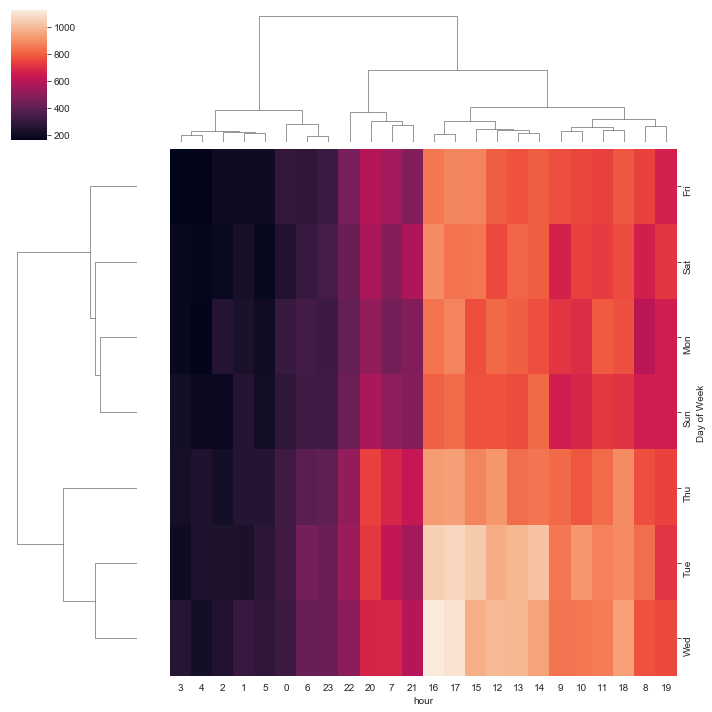

In [90]:
sns.clustermap(data=day_hr_pivot)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [98]:
month_day=df.groupby(by=["Month","Day of Week"]).count().reset_index()

In [99]:
month_day_pivot=month_day.pivot_table(index="Day of Week",columns="Month",values="lat")

In [100]:
month_day.head(3)

,Month,Day of Week,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,date
0,1,Fri,1727,1727,1727,1506,1727,1727,1727,1717,1727,1727,1727,1727
1,1,Mon,1584,1584,1584,1387,1584,1584,1584,1578,1584,1584,1584,1584
2,1,Sat,1973,1973,1973,1699,1973,1973,1973,1960,1973,1973,1973,1973


In [101]:
month_day_pivot.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1727,1596,1525,1598,1538,1388,1692,1230,1065
Mon,1584,1229,1535,1601,1444,1676,1646,1021,1257
Sat,1973,1581,1266,1430,1590,1333,1670,1310,978
Sun,1700,1441,1102,1517,1730,1617,1717,1099,907
Thu,1960,1903,1900,1488,1918,1649,1672,1295,1266


Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


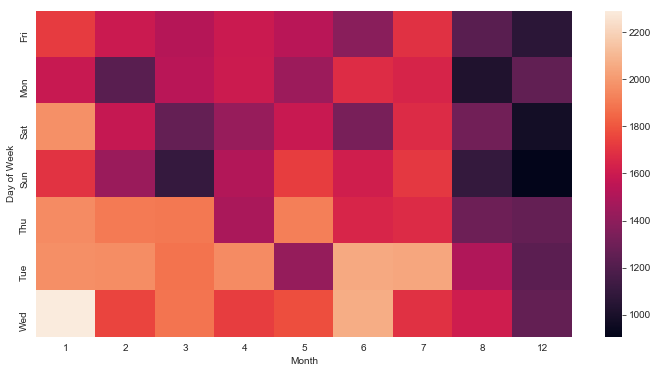

In [103]:
plt.figure(figsize=(12, 6))
sns.heatmap(month_day_pivot)

<Figure size 864x432 with 0 Axes>

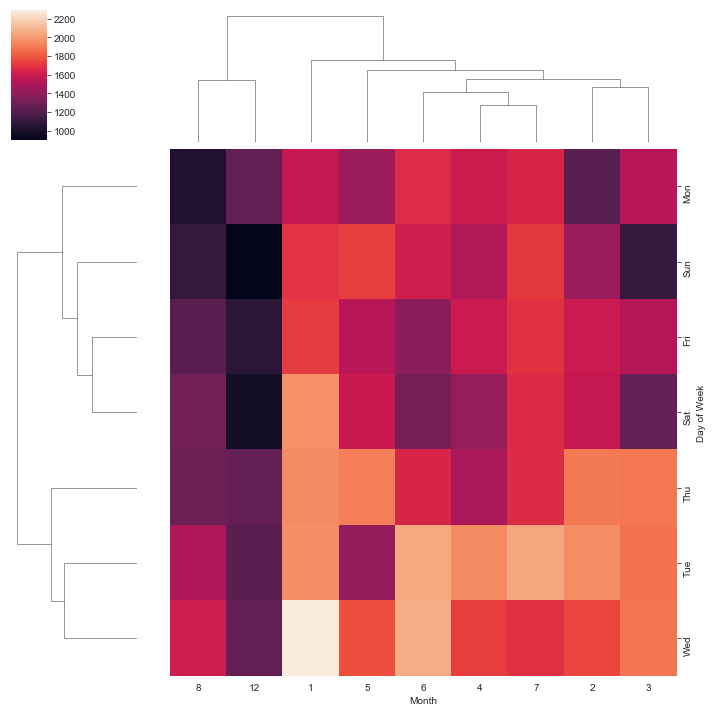

In [104]:
plt.figure(figsize=(12, 6))
sns.clustermap(month_day_pivot)

**Continue exploring the Data however you see fit!**
# Great Job!